In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
#read data from csv file using pandas

dataFrame1=pd.read_csv('Bengaluru_House_Data.csv')
dataFrame1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#print shape of dataframe

dataFrame1.shape

(13320, 9)

In [4]:
#To examine the area_type feature, group the data by area_type.

dataFrame1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#By assuming that few features does not have an impact on the price of the house like area_type, society, availability and balcony
#dropping them off from the dataframe.

dataFrame2=dataFrame1.drop(['area_type','society','availability','balcony'], axis='columns')
dataFrame2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
#To determine the number of rows where the field values are NA

dataFrame2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
#Drop the rows with NA values

dataFrame3=dataFrame2.dropna()
dataFrame3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
#To display unique values of size column

dataFrame3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
#Creating a column to avoid the problem of repeating sizes with different names. 
#For example, 4BHK and 4 Bedroom means same but they are treated as unique values.


dataFrame3['bhk']=dataFrame3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-9-7f3111caffaf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame3['bhk']=dataFrame3['size'].apply(lambda x: int(x.split(' ')[0]))


In [10]:
dataFrame3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
dataFrame3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
#To display unique values of total_sqft column

dataFrame3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
#To check if total_sqft has a number or a range
def is_number(x):
    try:
        float(x)
    except:
        return False
    return True   

In [14]:
#To find invalid float numbers

dataFrame3[~dataFrame3['total_sqft'].apply(is_number)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def convert_sqft_into_num(x):
    nums=x.split('-')
    if len(nums)==2:
        return (float(nums[0])+float(nums[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
convert_sqft_into_num('2166')

2166.0

In [17]:
dataFrame4=dataFrame3.copy()
dataFrame4['total_sqft']=dataFrame4['total_sqft'].apply(convert_sqft_into_num)
dataFrame4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [18]:
dataFrame4['price_per_sqft']=dataFrame4['price']*100000/dataFrame4['total_sqft']
dataFrame4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
len(dataFrame4.location.unique())

1304

In [20]:
#Find the number of data points available for the location
dataFrame4.location = dataFrame4.location.apply(lambda x: x.strip())

location_statistics = dataFrame4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_statistics

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [21]:
#Find the number of locations which has less than 10 data points
len(location_statistics[location_statistics<=10])

1052

In [22]:
len(dataFrame4.location.unique())

1293

In [23]:
location_statistics_less_than_10=location_statistics[location_statistics<=10]
location_statistics_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [24]:
#Placing all the locations which has less than 10 data points into other category

dataFrame4.location=dataFrame4.location.apply(lambda x: 'other' if x in location_statistics_less_than_10 else x)
len(dataFrame4.location.unique())

242

In [25]:
#To find ouliers

dataFrame4[dataFrame4.total_sqft/dataFrame4.bhk<400].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
16,Bisuvanahalli,3 BHK,1180.0,3.0,48.0,3,4067.796610
26,Electronic City,2 BHK,660.0,1.0,23.1,2,3500.000000
29,Electronic City,3 BHK,1025.0,2.0,47.0,3,4585.365854
31,Bisuvanahalli,3 BHK,1075.0,2.0,35.0,3,3255.813953


In [26]:
dataFrame4.shape

(13246, 7)

In [27]:
#Removal of outliers

dataFrame5=dataFrame4[~(dataFrame4.total_sqft/dataFrame4.bhk<400)]

In [28]:
#To show outliers have been removed

dataFrame5.shape

(11757, 7)

In [29]:
dataFrame5.price_per_sqft.describe()

count     11711.000000
mean       6183.801944
std        4009.858885
min         267.829813
25%        4208.337500
50%        5277.777778
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
#To remove price per sqft outliers

def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [31]:
dataFrame6=remove_pps_outliers(dataFrame5)
dataFrame6.shape

(9500, 7)

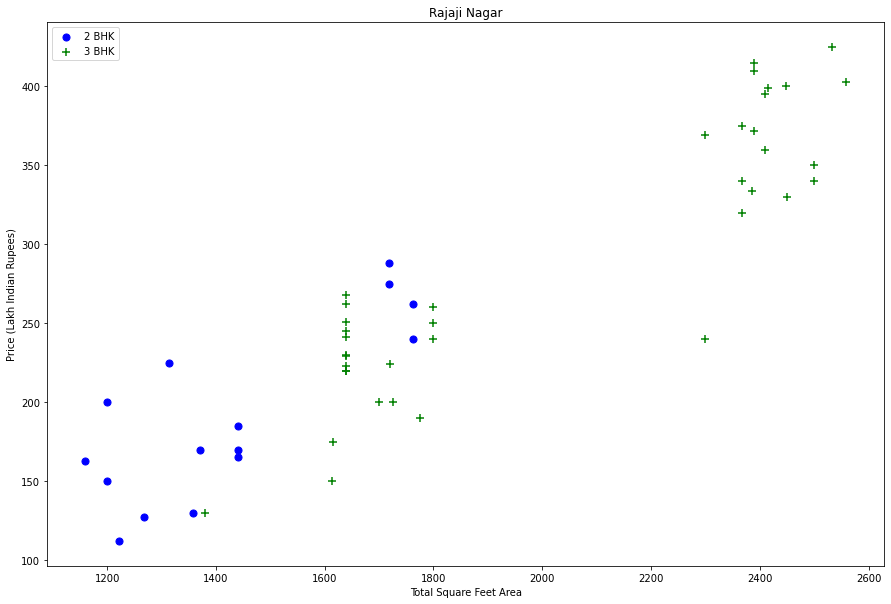

In [32]:
#Drawing ScatterPlot for visualization

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(dataFrame6,"Rajaji Nagar")

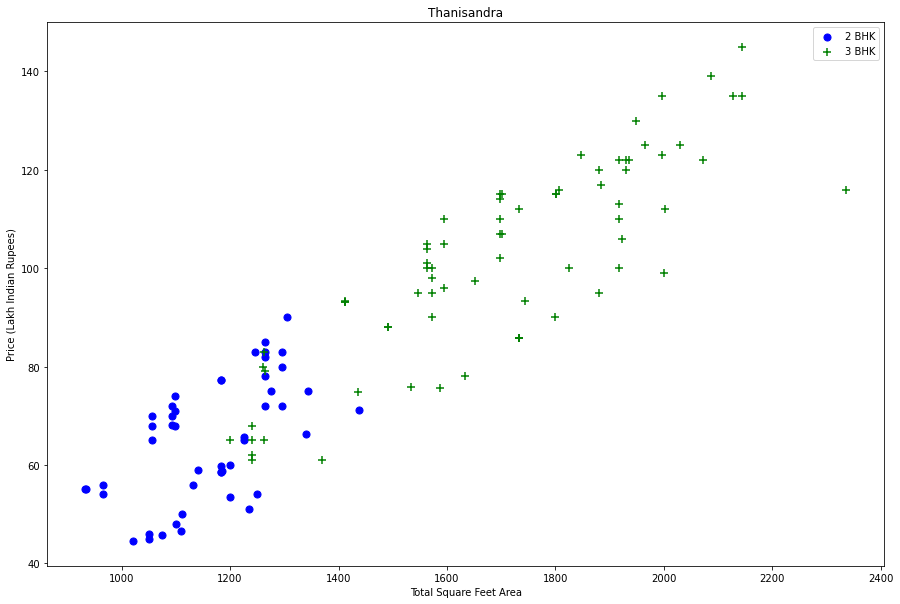

In [33]:
plot_scatter_chart(dataFrame6,"Thanisandra")

In [34]:
#Removal of properties where the price of 3 bhk is less than the price of 2 bhk 
#and where the price of 2bhk is less than the price of 1 bhk.

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


dataFrame7 = remove_bhk_outliers(dataFrame6)
dataFrame7.shape

(6847, 7)

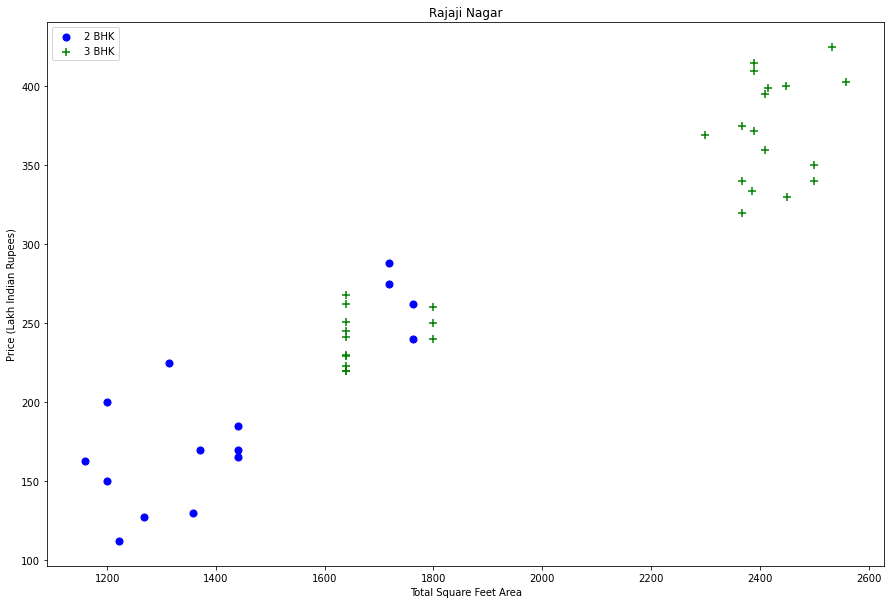

In [35]:
#Plotting the same scatter plots again to see improvements

plot_scatter_chart(dataFrame7,"Rajaji Nagar")

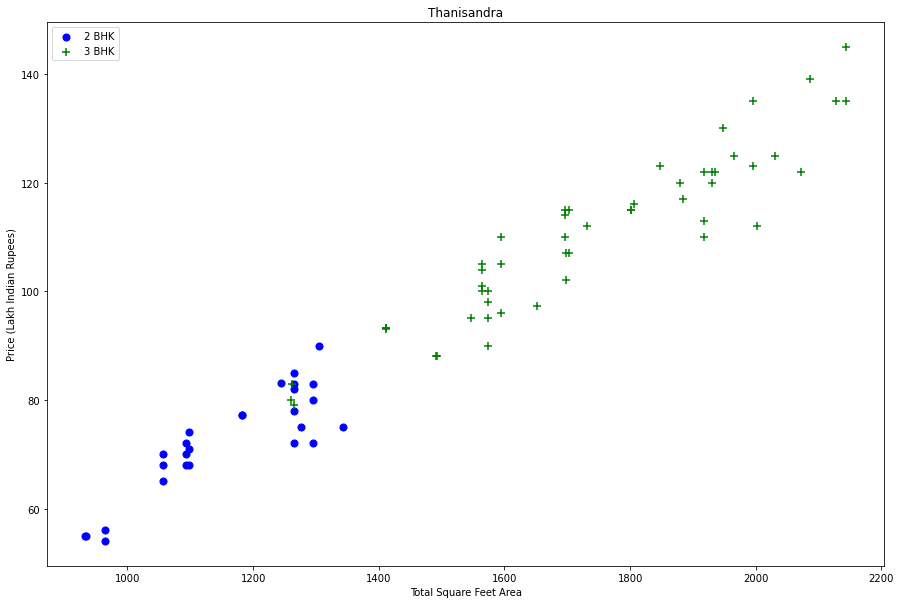

In [36]:
plot_scatter_chart(dataFrame7,"Thanisandra")

Text(0, 0.5, 'Count')

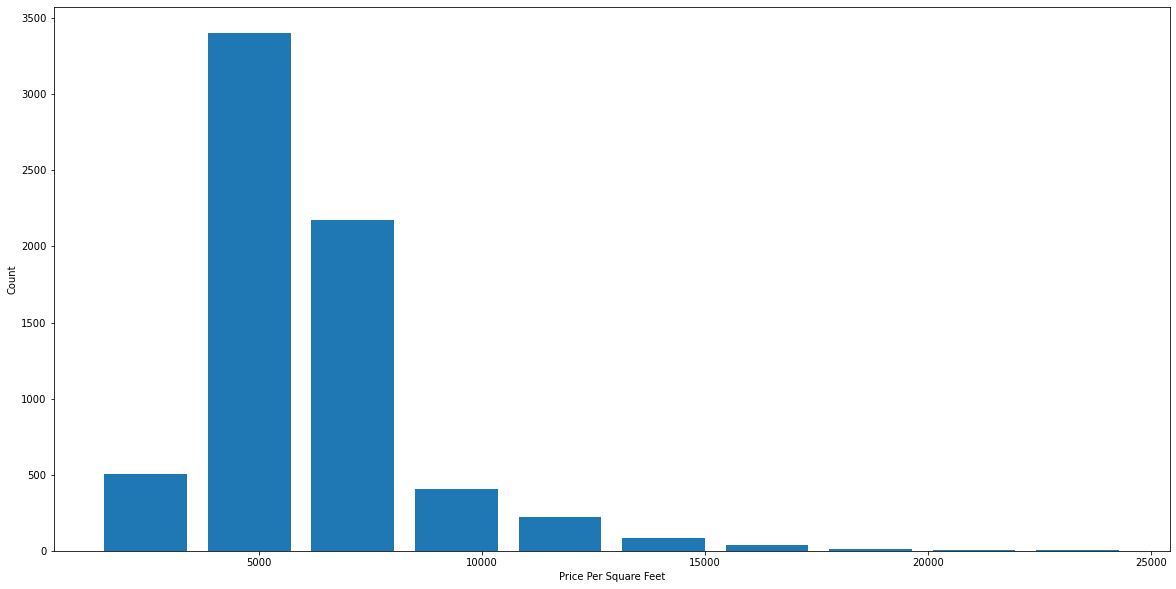

In [37]:
#Plotting histogram to see number of apartments or properties per sqft area

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(dataFrame7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count") 

In [38]:
#Finding number of unique bathrooms

dataFrame7.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

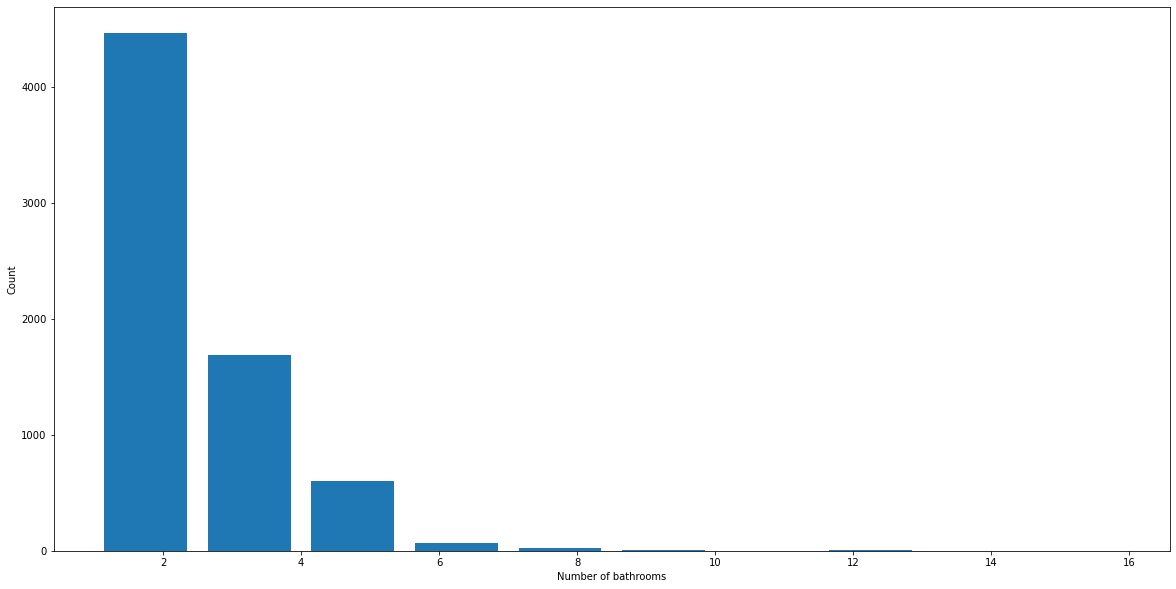

In [39]:
plt.hist(dataFrame7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [40]:
#Filtering properties for which number of bathrooms are greater thaan 10.

dataFrame7[dataFrame7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4833,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
7877,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
7956,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
8627,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8938,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [41]:
#Finds outliers depending on number of bathrooms

dataFrame7[dataFrame7.bath>dataFrame7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1445,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
4795,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6191,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7809,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [42]:
dataFrame8 = dataFrame7[dataFrame7.bath<dataFrame7.bhk+2]
dataFrame8.shape

(6774, 7)

In [43]:
#Removal of outliers

dataFrame9 = dataFrame8.drop(['size','price_per_sqft'],axis='columns')
dataFrame9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [44]:
dummies = pd.get_dummies(dataFrame9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
dataFrame10 = pd.concat([dataFrame9, dummies.drop('other', axis = "columns")], axis = "columns")
dataFrame10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
dataFrame11 = dataFrame10.drop('location', axis = 'columns')
dataFrame11.shape

(6774, 245)

In [47]:
X = dataFrame11.drop('price', axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
Y = dataFrame11.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [50]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8728962741933342

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([-1.08481790e+16,  8.55373834e-01,  8.06187827e-01,  8.57197413e-01,
        8.13950087e-01])

In [52]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'linear_regression with optimizers' : {
            'model': MLPRegressor(),
            'params': {
                'solver': ['sgd', 'adam'],
                'activation' : ['tanh', 'relu']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,-2.169636e+15,{'normalize': False}
1,lasso,7.069597e-01,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,7.886131e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,linear_regression with optimizers,7.178243e-01,"{'activation': 'relu', 'solver': 'adam'}"


In [54]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [55]:
predict_price('1st Phassssse JP Nagar',1000, 2, 2)

<ipython-input-54-026fa2793f8f>:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:


74.23337920543793

In [56]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

82.73457356818427

In [57]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [58]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))